In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
# Importing the training set
dataset_ts = pd.read_csv(r'C:\CDAC_Study_Material\MACHINE LEARNING\Datasets\ZILLOW-M1301_MLPSF.csv')

dataset_ts.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\CDAC_Study_Material\\MACHINE LEARNING\\Datasets\\ZILLOW-M1301_MLPSF.csv'

In [2]:
dataset_ts.shape

NameError: name 'dataset_ts' is not defined

In [3]:
dataset_train = dataset_ts.iloc[:71,:]
dataset_train.shape

NameError: name 'dataset_ts' is not defined

In [42]:
training_set = dataset_train.iloc[:, 1].values
training_set[:5]

array([180620, 195000, 192500, 199900, 199900], dtype=int64)

In [43]:
training_set = training_set.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [44]:
training_set_scaled[:5]

array([[0.        ],
       [0.21029541],
       [0.17373501],
       [0.28195379],
       [0.28195379]])

In [45]:
timesteps=4
trn_size = dataset_train.shape[0]

In [46]:
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [47]:
X_train.shape

(67, 4)

In [48]:
X_train[:1]

array([[0.        , 0.21029541, 0.17373501, 0.28195379]])

In [49]:
y_train[:1]

array([0.28195379])

In [50]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [51]:
X_train.shape

(67, 4, 1)

In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
(X_train.shape[1],X_train.shape[2])

(4, 1)

In [54]:
model = keras.Sequential()

# Adding LSTM layers
model.add(keras.layers.LSTM(units=100,return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))
model.add(keras.layers.LSTM(units=70,return_sequences = True ))
model.add(keras.layers.LSTM(units=50 ))

# Adding the output layer
model.add(keras.layers.Dense(1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4, 100)            40800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 4, 70)             47880     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                24200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 112,931
Trainable params: 112,931
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(X_train, y_train, epochs = 75, batch_size = 25)

Epoch 1/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0148
Epoch 2/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0150
Epoch 3/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0152
Epoch 4/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0148
Epoch 5/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0149
Epoch 6/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0156
Epoch 7/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0171
Epoch 8/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0160
Epoch 9/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0137
Epoch 10/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0152
Epoch 11/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0171
Epoch 12/75
67/67 [==============================] - 0s 1ms/sample - loss: 0.0176
Epoch 13/75
67/67 [======

In [93]:
dataset_test = dataset_ts.iloc[71:,:]
dataset_test.shape

(12, 2)

In [94]:
test_set = dataset_test.iloc[:, 1].values
test_set

array([209000, 212000, 209500, 225000, 237250, 230000, 230000, 229000,
       215000, 199700, 199900, 199000], dtype=int64)

In [95]:
dataset_total = pd.concat((dataset_train['Value'], dataset_test['Value']), axis = 0)
dataset_total

0     180620
1     195000
2     192500
3     199900
4     199900
       ...  
78    229000
79    215000
80    199700
81    199900
82    199000
Name: Value, Length: 83, dtype: int64

In [96]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
len(inputs)

16

In [97]:
inputs = sc.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(12, 4, 1)

In [98]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.3525278 ],
       [0.41491044],
       [0.44845158],
       [0.42859825],
       [0.52641845],
       [0.7236869 ],
       [0.799145  ],
       [0.71091926],
       [0.64578426],
       [0.53958786],
       [0.33038223],
       [0.24759667]], dtype=float32)

In [99]:
predicted_values.shape

(12, 1)

In [100]:
predicted_values = sc.inverse_transform(predicted_values)
predicted_values

array([[204725.86],
       [208991.58],
       [211285.11],
       [209927.55],
       [216616.48],
       [230105.72],
       [235265.53],
       [229232.67],
       [224778.73],
       [217517.03],
       [203211.55],
       [197550.66]], dtype=float32)

In [101]:
%matplotlib inline

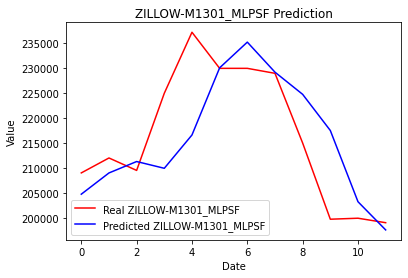

In [102]:
plt.plot(test_set, color = 'red', label = 'Real ZILLOW-M1301_MLPSF')
plt.plot(predicted_values, color = 'blue', label = 'Predicted ZILLOW-M1301_MLPSF')
plt.title('ZILLOW-M1301_MLPSF Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [103]:
print(np.sqrt(mean_squared_error(predicted_values,test_set)))

9735.479043790132
